<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# snowflake: 
# *Database Programming with Python and cloud data platform Snowflake*

<a name="demo"></a>
## Using Snowflake

### Advantages of Snowflake

- seperates compute and storage
- has the advantages of cloud i.e. availability and scalability (vs SQL HA/Clusters etc)
- easy to implement advanced features i.e. zero copy clones and time travel
- can be used for small or large databases, datalake and model inference workloads

## Set Up

### Start Free Trial

1. Open https://signup.snowflake.com and sign up for the free trial

During setup you'll need to decide the following:

1.1 The cloud platform to host your snowflake instance on. Pick AWS if you're unsure
1.2 The type of account to create. Select Enterprise to get access to all features.
1.3 The cloud region to host your snowflake instance. Pick the nearest to you. For NZ/AU it is likely to be Sydney
1.4 Answer their marketing questions. These make no difference to your setup.

This will give you 400 credits to use within 30 days for learning. While database security best practice is to create roles with the minimum access required for their activities, we will use the ACCOUNTADMIN role for this lab as the focus is on applying SQL not Database Administration 

2. Here are some quickstart guides for further practice should you wish to learn more

Snowflake in 20min: https://docs.snowflake.com/en/user-guide/getting-started-tutorial

Getting started, Zero to Snowflake: https://quickstarts.snowflake.com/guide/getting_started_with_snowflake/index.html#5

## Setup your first database, schema and table

To set up the database, schema we will be using in this lab, open a new worksheet in Snowflake and run the following SQL commands.

**Create a database:**

`create or replace database iod comment = 'A database for module 3 SQL in the IOD data science course';`

**Create a schema under that database:**

`create or replace schema iod.demo_schema comment = 'schema for lab 3.1.3';`

**Next** we will create a simple table and populate it with sample data. Again, run these SQL commands in a Snowflake worksheet

**Check you are using the schema you created:**

`use iod.demo_schema;`

**Create a new table:**

`create or replace table houses (
    field1 integer NULL,
    sqft integer NULL,
    bdrms integer NULL,
    age integer NULL,
    price integer NULL
);`

**Insert values into this new table:**


`insert into houses
values
(1, 4000, 5, 22, 619000),
(2, 2390, 4, 34, 319000),
(3, 1870, 3, 14, 289000),
(4, 1505, 3, 90, 269000);`

**Check the values are in the table:**

`select * from houses`


Output:  

4 rows of fictitious house price data

### Basic SQL Using This Dummy Data

**Use SQL in a Snowflake worksheet to try the following practice questions. As there are only 4 rows in the table you can easily  evaluate the result of your SQL statements**

1. Count the number of rows
1. Select the number of bedrooms and age for all houses
1. Use the `where` clause, to count the number of houses with 3 bedrooms 
1. Use `avg` and `group by` to find the average square footage by `bdrms` (admittedly silly given the small dataset but practice the syntax)

The `DELETE FROM` statement can be used with a `WHERE` clause to specify rows to delete based on some criteria. Practice by doing the following:

5. Delete rows with 4 bedrooms
6. Delete rows where age is between 20 and 25
7. Delete rows where the price is less than 300k

QUIZ: What would `DELETE FROM houses` do?

The table should now be empty ready for the next step

### Section 1 Questions

This section uses the housing data. This has been shared with you via snowflake "shares" as we could not reliably get snowpark installed within the class network. 

Answer the following questions using the newly shared housing data. Use SQL in a snowflake worksheet

1. How many rows does the `houses` table now have?

Answer: 47

2. How many rows have 4 bedrooms?

Answer:14

3. What are the average floor area and price of each size of house (i.e. by number of bedrooms)?


**Answer:**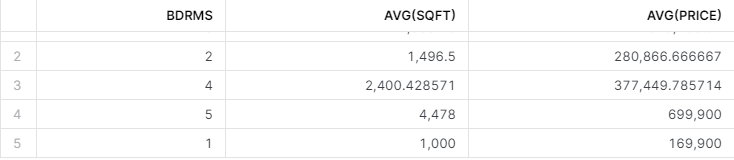

4. What is the minimum and maximum price of houses with an `age` of 28? HINT: `having`

**Answer:**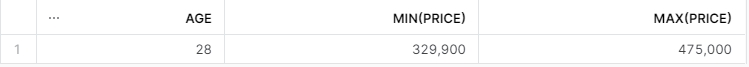

### Section 2 Questions

Next, we you will write SQL against two tables. Again, the data has been shared with you via snowflake "shares". The two tables are:

1. `ORDERS` which comes from the `P12-ListOfOrders.csv` file in the data folder on google classwork
1. `ORDERS_BREAKDOWN` which comes from the `P12-OrderBreakdown.csv` file in the data folder on google classwork

Below are the heads of the two csv files. Do not run these cells

In [ ]:
orders.head()

,Order ID,Order Date,Customer Name,Country
0,IT-2011-3647632,2011-01-01,Eugene Moren,Sweden
1,ES-2011-4869686,2011-01-03,Dorothy Dickinson,United Kingdom
2,ES-2011-4939443,2011-01-04,Arthur Prichep,France
3,IT-2011-2942451,2011-01-04,Grant Thornton,United Kingdom
4,ES-2011-3848439,2011-01-05,Michael Granlund,France


In [ ]:
orders_break_down.head()

,Order ID,Product Name,Discount,Sales,Quantity,Category
0,IT-2011-3647632,"Enermax Note Cards, Premium",0.5,45.0,3,Office Supplies
1,ES-2011-4869686,"Dania Corner Shelving, Traditional",0.0,854.0,7,Furniture
2,ES-2011-4939443,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140.0,3,Office Supplies
3,IT-2011-2942451,"Boston Markers, Easy-Erase",0.5,27.0,2,Office Supplies
4,IT-2011-2942451,"Eldon Folders, Single Width",0.5,17.0,2,Office Supplies


### How to answer the questions in this section

The questions in this section are followed by a screenshot of the expected result. For each question, write your SQL in the snowflake IDE ("worksheets"). When you have obtained the same result as the screenshot, paste your SQL in the answer cell.

The first question has been answered for you:

#### Example Question: Select the first 10 rows of an inner join between orders and orders_breakdown

```sql
select * 
from orders o
    join orders_breakdown ob on ob.order_id = o.order_id
limit 10;
```

#### 5. Get the count of distinct orders for each customer

**Answer:**

```sql
select distinct count(order_id)
from orders
group by customer_name


```

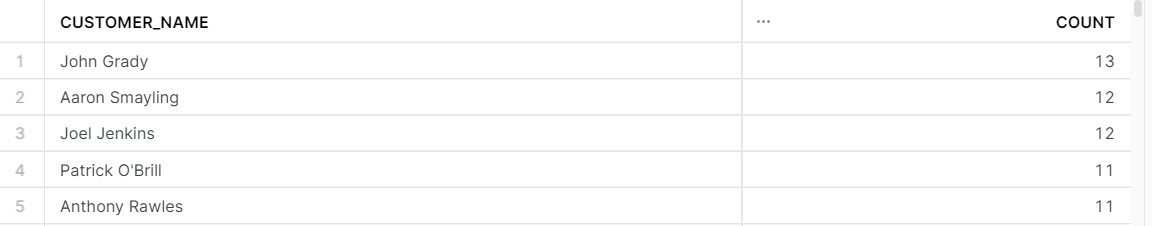

#### 6. Get the count of customers by country

**Answer:**

```sql
select 
    country
    ,count(distinct customer_name)
from orders
group by country


```

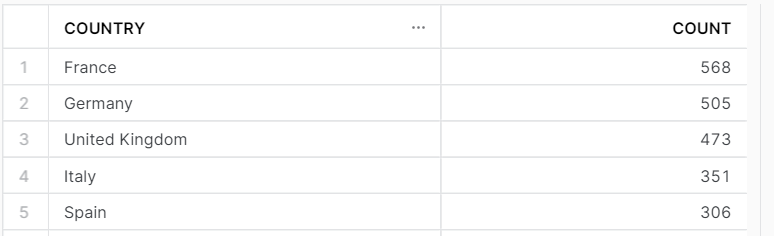

#### 7.A Select discount, sales, quantity for Each Order from orders_breakdown Table


In [2]:
**Answer:**

select
     Discount
    ,Sales
    ,Quantity
    ,order_id
from  orders_breakdown

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

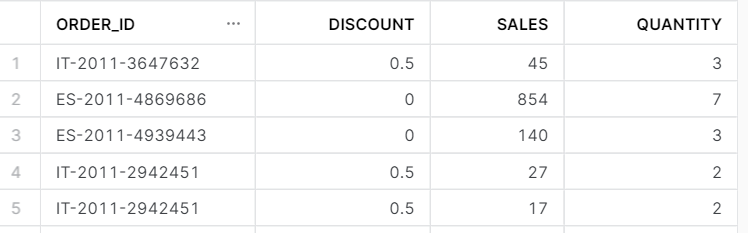

#### 7.B Select discount, sales, quantity, total price for Each Order line from orders_breakdown Table

> Total Price = sales * quantity - discount

**Answer:
select
     order_id
    ,Discount
    ,Sales
    ,Quantity
    ,(sales * quantity-discount) AS total_price
from  orders_breakdown



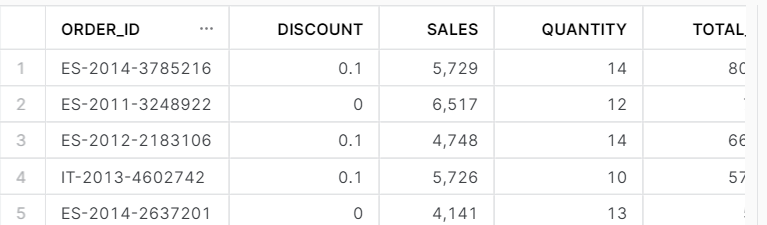

#### 7.C Select All Orders from orders_breakdown Table Where Total Price Greater Than 100

Answer:
SELECT *
FROM orders_breakdown
WHERE (sales * quantity) > 100

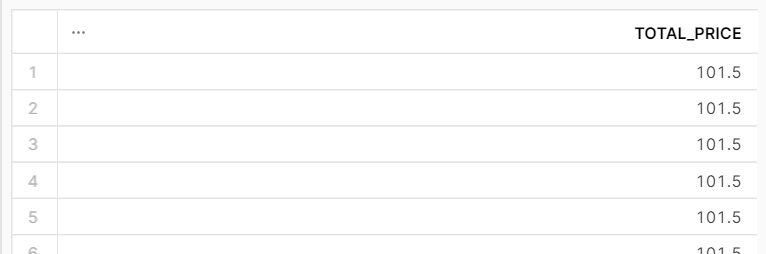

#### 8. Select All Customers And The Products They Have Bought

In [ ]:
# **Answer:**

select customer_name, product_name
from orders_breakdown
join orders

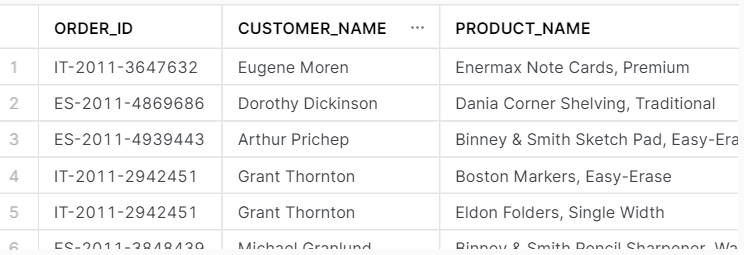

#### 9.A Select Number of 'Furniture' Orders For Each Country 

In [ ]:
**Answer:**

SELECT country, COUNT(*) AS furniture_orders
FROM orders
GROUP BY country;


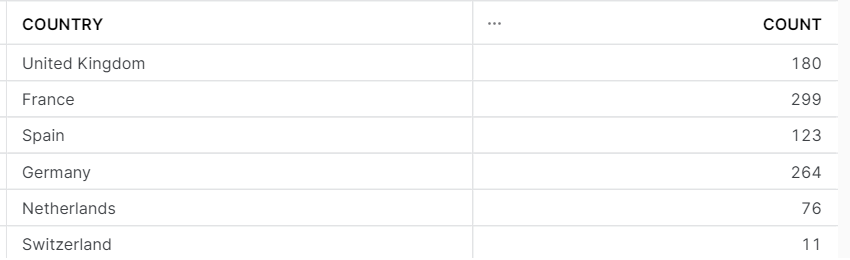

#### 9.B Select Number of 'Furniture' Orders For The Country Denmark

**Answer:**

SELECT COUNT(*) AS furniture_orders
FROM orders
group by country = 'Denmark'

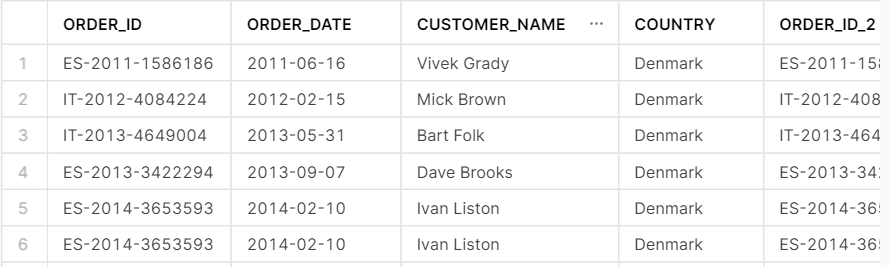

#### 10. Select Total Sales With Discount and Without Discount for Each Country

**Answer:**

SELECT order_id
      SUM(sales * (1 - discount) AS total_sales_with_discount
     ,SUM(sales) AS total_sales_without_discount
from orders_breakdown
GROUP BY country;

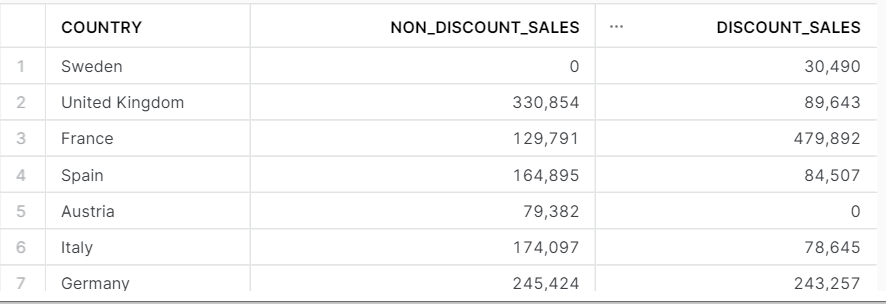

#### 11.A Select Total Quantity, Total Sales for Each Country

**Answer:**

SELECT 
     sum(quantity) AS total_quantity 
    ,sum(sales) AS total_sales
FROM orders_breakdown
GROUP BY order_id;

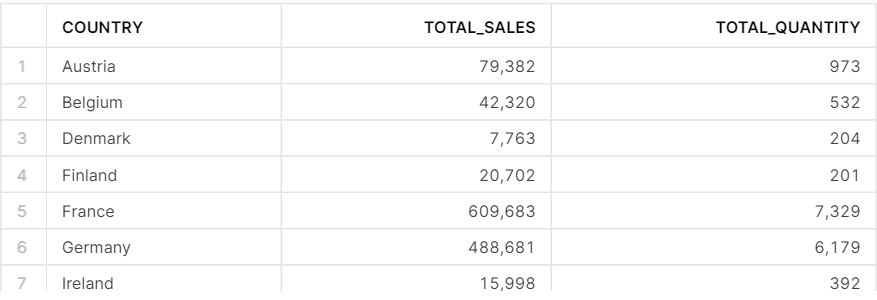

#### 11.B Select Top 3 Countries and Quantities Based on Total Sales

**Answer:**

SELECT country
     SUM(quantity) AS total_quantity
    ,SUM(sales) AS total_sales
FROM orders_breakdown
GROUP BY order
ORDER BY total_sales DESC
LIMIT 3;

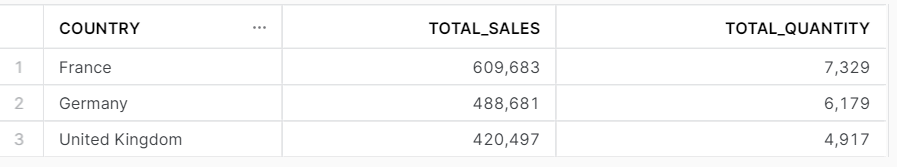

#### 11.C Select Bottom 3 Countries and Sales Based On Total Quantities

**Answer:**

SELECT country, SUM(quantity) AS total_quantity, SUM(sales) AS total_sales
FROM orders
GROUP BY country
ORDER BY total_quantity ASC
LIMIT 3;

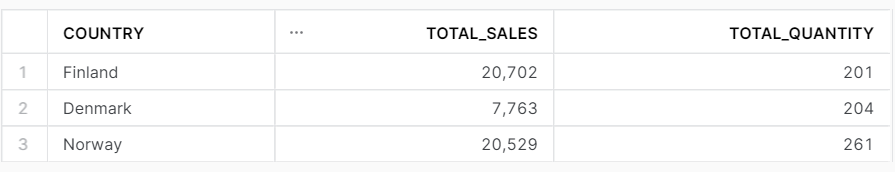

#### 12. Select Average Sales By Category For The Country 'France'

**Answer:**

SELECT orders_breakdown
    ,AVG(sales) AS average_sales
FROM orders
group by category
where country ='France'

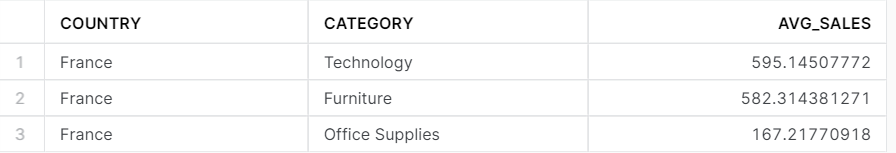

#### 13. Select Country, Category and Average Sales Where Average Sales is The Highest

**Answer:**
SELECT country, category, AVG(sales) AS average_sales
FROM orders
GROUP BY country, category
HAVING AVG(sales) = (SELECT MAX(avg_sales) FROM (SELECT country, category, AVG(sales) AS avg_sales FROM orders GROUP BY country, category) AS temp_table);

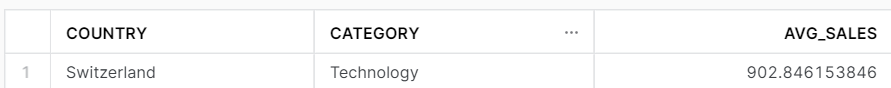

<a name="guided-practice"></a>


# Reference: SQL Syntax 


#### SELECT Statement
Every query should start with `SELECT`.  `SELECT` is followed by the names of the columns in the output.

`SELECT` is always paired with `FROM`, and `FROM` identifies the table to retrieve data from.

```sql
SELECT
<columns>
FROM
<table>
```

`SELECT *` denotes returns *all* of the columns.

Housing Data example:
```sql
SELECT
sqft, bdrms
FROM houses_pandas;
```

**Check:** Write a query that returns the `sqft`, `bdrms` and `price`.

```sql
SELECT
sqft, bdrms, price
FROM houses_pandas;
```

#### WHERE Clause
`WHERE` is used to filter table to a specific criteria and follows the `FROM` clause.

```sql
SELECT
<columns>
FROM
<table>
WHERE
<condition>
```
Example:
```sql
SELECT
sqft, bdrms, age, price
FROM houses_pandas
WHERE bdrms = 2 and price < 250000;
```

The condition is effectively a row filter; rows that match the condition will be included in the rowset that is returned by the query.

**Check:** Write a query that returns the `sqft`, `bdrms`, `age` for houses older than 60 years.
>```sql
SELECT
sqft, bdrms, age
FROM houses_pandas
WHERE age > 60;
```


### AGGREGATIONS

Aggregations (or aggregate functions) are functions where the values of multiple rows are grouped together as input on certain criteria to form a single value of more significant meaning or measurement such as a set, a bag or a list.

Examples of aggregate functions:

- Average (i.e., arithmetic mean)
- Count
- Maximum
- Minimum
- Median
- Mode
- Sum

In SQL they are performed in a `SELECT` statement as follows.

```sql
SELECT COUNT(price)
FROM houses_pandas;
```

```sql
SELECT AVG(sqft), MIN(price), MAX(price)
FROM houses_pandas
WHERE bdrms = 2;
```

### JOINS

Below is a link to a handy reference for SQL joins. In this chart joins are represented in terms of sets and venn diagrams. 
https://www.codeproject.com/Articles/33052/Visual-Representation-of-SQL-Joins

Alternatively, remember the merge functionality of pandas.
https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

### ADDITIONAL RESOURCES

- [SQL zoo](http://www.sqlzoo.net)  Great for learning syntax
- [End to end ML workflow in Snowpark](https://github.com/Snowflake-Labs/sfguide-getting-started-machine-learning) For a peek into the future 




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



